# The Sparks Foundation

## Data science and Business analtics internship

### Notebook by - Chirag M Naik

### Problem statement
What will be predicted score if a student studies for 9.25 hrs/ day?



### Simple Linear Regression
In this prediction task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

#### importing required libraries

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for meodel building
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [7]:
# importing data
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### Data understanding and Data preaparion

In [67]:
# checking the shape of the data
data.shape

(25, 2)

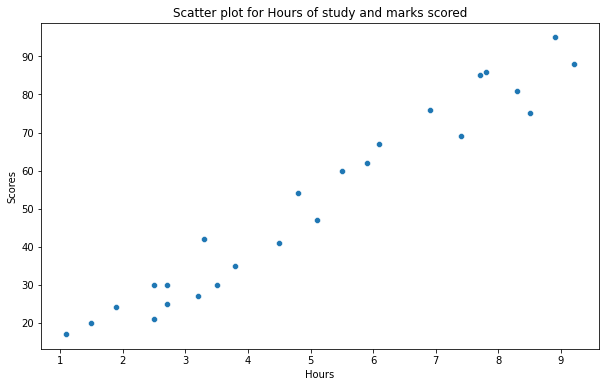

In [68]:
#scatterplot to see realtion between the variabes
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,x='Hours',y='Scores')
plt.title("Scatter plot for Hours of study and marks scored")
plt.show()

**Inference** - from the graph we can see that the two features have positive linear correlation

#### Model building

In [107]:
#model labeling
X=(data['Hours'].values).reshape(-1,1)
y=data['Scores'].values

#splitting into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)

In [109]:
#initializing a linear regression model
linreg = LinearRegression()

linreg.fit(X_train,y_train)

LinearRegression()

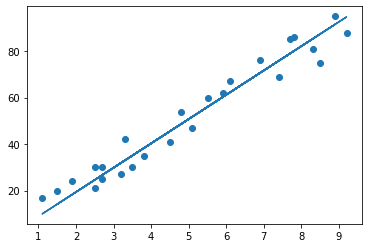

In [110]:
#regression line
line = linreg.coef_*X+linreg.intercept_

plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [111]:
predicted

array([[ 9.97026179],
       [32.98470004],
       [18.33914843],
       [87.38246316],
       [48.67636248]])

In [112]:
y_test

array([17, 42, 24, 75, 54], dtype=int64)

In [114]:
#predicting the test data and comparing with actual
predicted=linreg.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})  
df['error']=df['Actual']-df['Predicted']
df

,Actual,Predicted,error
0,17,9.970262,7.029738
1,42,32.984700,9.015300
2,24,18.339148,5.660852
3,75,87.382463,-12.382463
4,54,48.676362,5.323638


#### Problem statement solution
What will be predicted score if a student studies for 9.25 hrs/ day?

In [127]:
hours=np.array([9.25,1])
hours.reshape(-1,1)

array([[9.25],
       [1.  ]])

In [130]:
study=linreg.predict(hours.reshape(-1,1))
print("The predicted score for the student who studies 9.25hrs/day is ",study[0])

The predicted score for the student who studies 9.25hrs/day is  95.22829438402952


### Model Evaluation

In [132]:
print('Mean Absolute Error:', mean_absolute_error(y_test,predicted)) 

Mean Absolute Error: 7.882398086270432


In [134]:
print('Root mean sqaured error:', np.sqrt(mean_squared_error(y_test,predicted)))

Root mean sqaured error: 8.299453038771674


In [138]:
print("R-Squared :", r2_score(y_test,predicted))

R-Squared : 0.8421031525243527


### Conclusion:
* The model predicts with R-squared value of 0.84 *
* For a student who studies 9.25 hours a day the model predicts his/her score to be 95.228%
 